In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Cargar archivo csv
data = pd.read_csv('Mexico_Sin_Nulos.csv')

# Eliminar la columna 'Unnamed'
data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])
data.to_csv('Mexico_Sin_Nulos.csv', index=False)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   scrape_id                                     26582 non-null  int64  
 2   last_scraped                                  26582 non-null  object 
 3   name                                          26582 non-null  object 
 4   host_id                                       26582 non-null  int64  
 5   host_name                                     26582 non-null  object 
 6   host_since                                    26582 non-null  object 
 7   host_response_time                            26582 non-null  object 
 8   host_response_rate                            26582 non-null  float64
 9   host_acceptance_rate                          26582 non-null 

In [3]:
# Identificar valores nulos por dataframe
valores_nulos = data.isnull().sum()
valores_nulos

id                                              0
scrape_id                                       0
last_scraped                                    0
name                                            0
host_id                                         0
host_name                                       0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_identity_verified                          0
neighbourhood                                   0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0


In [4]:
# Crear 2 dataframe para poder procesar los outliers

cuantitativas = data.iloc[:, [ 0, 1, 4, 8, 9, 11, 12, 15, 16, 19, 20, 21, 22, 24, 25, 26, 27, 28, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 46, 47, 48, 49]]
cualitativas = data.iloc[:, [ 2, 3, 5, 6, 7, 10, 13, 14, 17, 18, 23, 29, 30, 35, 36, 44, 45]]

In [7]:
cuantitativas

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,35797,20240925021012,153786,0.00,0.99,1,1,19.383820,-99.273340,2,...,4.56,5.00,4.87,4.78,4.98,4.48,1,1,0,0
1,44616,20240925021012,196253,1.00,0.93,12,13,19.411620,-99.177940,14,...,4.56,4.70,4.87,4.78,4.98,4.48,8,4,1,0
2,67703,20240925021012,334451,0.71,0.57,3,4,19.411520,-99.168570,4,...,4.81,4.75,4.94,4.92,4.98,4.91,2,2,0,0
3,70644,20240925021012,212109,1.00,1.00,3,4,19.356140,-99.163080,2,...,4.90,4.96,4.96,4.98,4.96,4.92,3,2,1,0
4,107078,20240925021012,540705,1.00,1.00,5,7,19.432110,-99.193270,2,...,5.00,5.00,5.00,4.73,4.91,4.82,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1252141718111439700,20240925021012,67472234,1.00,1.00,167,279,19.387329,-99.246731,4,...,5.00,5.00,5.00,5.00,5.00,5.00,37,14,23,0
26578,1252159821531694005,20240925021012,596009321,1.00,1.00,16,16,19.432687,-99.197736,2,...,5.00,5.00,5.00,5.00,5.00,5.00,16,8,8,0
26579,1252185591721328995,20240925021012,596009321,1.00,1.00,16,16,19.432687,-99.197736,2,...,5.00,5.00,5.00,5.00,5.00,5.00,16,8,8,0
26580,1252218347521498445,20240925021012,596009321,1.00,1.00,16,16,19.432687,-99.197736,2,...,5.00,5.00,5.00,5.00,5.00,5.00,16,8,8,0


<Figure size 1500x800 with 0 Axes>

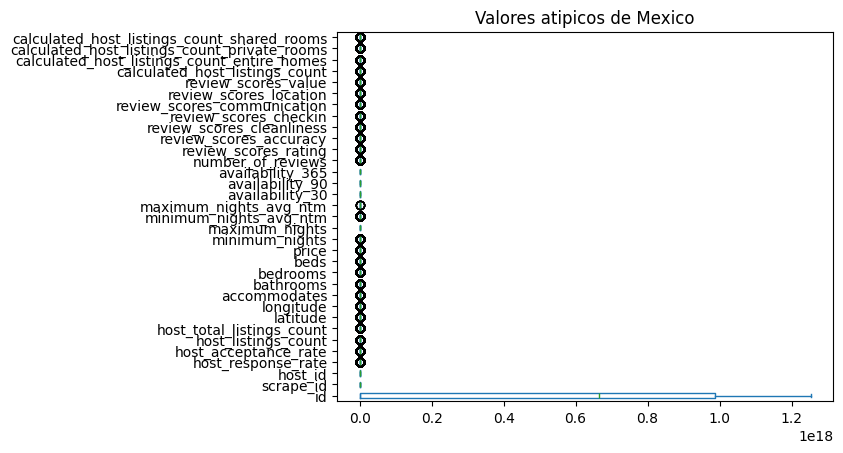

In [8]:
# Realizamos diagrama de caja o bigote 
fig = plt.figure(figsize = (15,8))
cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos de Mexico")
plt.show()

PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME 

In [5]:
# Método aplicando desviación estándar (encontrar valores extremos )
y = cuantitativas
limite_superior = y.mean() + 3*y.std()
limite_inferior = y.mean() - 3*y.std()

print("Limite superior permitido", limite_superior)
print("Limite inferior permitido", limite_inferior)

Limite superior permitido id                                              1.997574e+18
scrape_id                                       2.024093e+13
host_id                                         7.675833e+08
host_response_rate                              1.509892e+00
host_acceptance_rate                            1.578158e+00
host_listings_count                             3.295566e+02
host_total_listings_count                       6.148874e+02
latitude                                        1.953289e+01
longitude                                      -9.906674e+01
accommodates                                    1.043010e+01
bathrooms                                       4.605316e+00
bedrooms                                        5.345804e+00
beds                                            6.981545e+00
price                                           1.578231e+04
minimum_nights                                  8.183006e+01
maximum_nights                                  1.793887e+0

In [6]:
# Obtenemos datos y los outliers se convierten en nulos en el dataframe
data1 = cuantitativas[( y <= limite_superior) & (y >= limite_inferior)]
data1

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,35797,20240925021012,153786,NaN,0.99,1.0,1.0,19.383820,NaN,2.0,...,4.56,5.00,4.87,4.78,4.98,4.48,1.0,1.0,0.0,0.0
1,44616,20240925021012,196253,1.00,0.93,12.0,13.0,19.411620,-99.177940,NaN,...,4.56,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0
2,67703,20240925021012,334451,0.71,0.57,3.0,4.0,19.411520,-99.168570,4.0,...,4.81,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0
3,70644,20240925021012,212109,1.00,1.00,3.0,4.0,19.356140,-99.163080,2.0,...,4.90,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0
4,107078,20240925021012,540705,1.00,1.00,5.0,7.0,19.432110,-99.193270,2.0,...,5.00,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1252141718111439700,20240925021012,67472234,1.00,1.00,167.0,279.0,19.387329,-99.246731,4.0,...,5.00,5.00,5.00,5.00,5.00,5.00,37.0,14.0,23.0,0.0
26578,1252159821531694005,20240925021012,596009321,1.00,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,8.0,0.0
26579,1252185591721328995,20240925021012,596009321,1.00,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,8.0,0.0
26580,1252218347521498445,20240925021012,596009321,1.00,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,8.0,0.0


In [7]:
#Corroboramos valores nulos del dataframe
valores_nulos = data1.isnull().sum()
valores_nulos

id                                                 0
scrape_id                                          0
host_id                                            0
host_response_rate                               990
host_acceptance_rate                            1105
host_listings_count                              304
host_total_listings_count                        380
latitude                                         357
longitude                                        712
accommodates                                     526
bathrooms                                        309
bedrooms                                         286
beds                                             466
price                                             94
minimum_nights                                   190
maximum_nights                                     1
minimum_nights_avg_ntm                           184
maximum_nights_avg_ntm                             7
availability_30                               

In [8]:
# Reemplazamos valores atípicos (nulos) del dataframe con "mean" 
# Realizamos una copia del dataframe
data_clean = data1.copy()
data_clean = data_clean.fillna(round(data1.mean(),1))
data_clean

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,35797,20240925021012,153786,1.00,0.99,1.0,1.0,19.383820,-99.200000,2.0,...,4.56,5.00,4.87,4.78,4.98,4.48,1.0,1.0,0.0,0.0
1,44616,20240925021012,196253,1.00,0.93,12.0,13.0,19.411620,-99.177940,3.1,...,4.56,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0
2,67703,20240925021012,334451,0.71,0.57,3.0,4.0,19.411520,-99.168570,4.0,...,4.81,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0
3,70644,20240925021012,212109,1.00,1.00,3.0,4.0,19.356140,-99.163080,2.0,...,4.90,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0
4,107078,20240925021012,540705,1.00,1.00,5.0,7.0,19.432110,-99.193270,2.0,...,5.00,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1252141718111439700,20240925021012,67472234,1.00,1.00,167.0,279.0,19.387329,-99.246731,4.0,...,5.00,5.00,5.00,5.00,5.00,5.00,37.0,14.0,23.0,0.0
26578,1252159821531694005,20240925021012,596009321,1.00,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,8.0,0.0
26579,1252185591721328995,20240925021012,596009321,1.00,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,8.0,0.0
26580,1252218347521498445,20240925021012,596009321,1.00,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,8.0,0.0


In [9]:
# Corroboramos valores nulos del dataframe limpio
valores_nulos = data_clean.isnull().sum()
valores_nulos

id                                              0
scrape_id                                       0
host_id                                         0
host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_90                                 0


In [10]:
data_clean.to_csv("Mexico_DesviacionEstandar.csv")

PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME

In [14]:
# Método aplicando cuartiles (0.25 y 0.75)
y = cuantitativas

porcentile25 = y.quantile(0.25) 
porcentile75 = y.quantile(0.75)

iqr = porcentile75 - porcentile25

#Q1
limite_superior_iqr = porcentile75 + 1.5*iqr

#Q2
limite_inferior_iqr = porcentile25 - 1.5*iqr

print("Limite superior permitido", limite_superior_iqr)
print("Limite inferior permitido", limite_inferior_iqr)

Limite superior permitido id                                              2.467577e+18
scrape_id                                       2.024093e+13
host_id                                         8.612864e+08
host_response_rate                              1.000000e+00
host_acceptance_rate                            1.060000e+00
host_listings_count                             3.350000e+01
host_total_listings_count                       3.950000e+01
latitude                                        1.949409e+01
longitude                                      -9.911773e+01
accommodates                                    7.000000e+00
bathrooms                                       3.500000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           2.713500e+03
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+0

In [15]:
data1_iqr = cuantitativas[( y <= limite_superior_iqr) & (y >= limite_inferior_iqr)]
data1_iqr

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,35797,20240925021012,153786,NaN,0.99,1.0,1.0,19.383820,NaN,2.0,...,4.56,5.00,4.87,4.78,4.98,4.48,1.0,1.0,0.0,0.0
1,44616,20240925021012,196253,1.0,0.93,12.0,13.0,19.411620,-99.177940,NaN,...,4.56,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0
2,67703,20240925021012,334451,NaN,NaN,3.0,4.0,19.411520,-99.168570,4.0,...,4.81,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0
3,70644,20240925021012,212109,1.0,1.00,3.0,4.0,19.356140,-99.163080,2.0,...,4.90,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0
4,107078,20240925021012,540705,1.0,1.00,5.0,7.0,19.432110,-99.193270,2.0,...,5.00,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1252141718111439700,20240925021012,67472234,1.0,1.00,NaN,NaN,19.387329,NaN,4.0,...,5.00,5.00,5.00,5.00,5.00,5.00,NaN,14.0,NaN,0.0
26578,1252159821531694005,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,NaN,0.0
26579,1252185591721328995,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,NaN,0.0
26580,1252218347521498445,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,NaN,0.0


In [16]:
valores_nulos = data1_iqr.isnull().sum()
valores_nulos

id                                                 0
scrape_id                                          0
host_id                                            0
host_response_rate                              5377
host_acceptance_rate                            4756
host_listings_count                             3567
host_total_listings_count                       3764
latitude                                        1779
longitude                                       2845
accommodates                                    1352
bathrooms                                        644
bedrooms                                         858
beds                                            2447
price                                           2161
minimum_nights                                  3584
maximum_nights                                     0
minimum_nights_avg_ntm                          2023
maximum_nights_avg_ntm                             7
availability_30                               

In [17]:
# Reemplazamos valores atípicos (nulos) del dataframe con "mean" 
# Realizamos una copia del dataframe
data3_iqr = data1_iqr.copy()
data3_iqr = data3_iqr.fillna(round(data1_iqr.mean(),1))
data3_iqr

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,35797,20240925021012,153786,1.0,0.99,1.0,1.0,19.383820,-99.200000,2.0,...,4.56,5.00,4.87,4.78,4.98,4.48,1.0,1.0,0.0,0.0
1,44616,20240925021012,196253,1.0,0.93,12.0,13.0,19.411620,-99.177940,2.9,...,4.56,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0
2,67703,20240925021012,334451,1.0,1.00,3.0,4.0,19.411520,-99.168570,4.0,...,4.81,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0
3,70644,20240925021012,212109,1.0,1.00,3.0,4.0,19.356140,-99.163080,2.0,...,4.90,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0
4,107078,20240925021012,540705,1.0,1.00,5.0,7.0,19.432110,-99.193270,2.0,...,5.00,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1252141718111439700,20240925021012,67472234,1.0,1.00,6.2,7.3,19.387329,-99.200000,4.0,...,5.00,5.00,5.00,5.00,5.00,5.00,4.9,14.0,0.7,0.0
26578,1252159821531694005,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,0.7,0.0
26579,1252185591721328995,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,0.7,0.0
26580,1252218347521498445,20240925021012,596009321,1.0,1.00,16.0,16.0,19.432687,-99.197736,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,0.7,0.0


In [18]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo 

datos_limpios = pd.concat([cualitativas, data3_iqr], axis = 1)
datos_limpios

,last_scraped,name,host_name,host_since,host_response_time,host_is_superhost,host_identity_verified,neighbourhood,property_type,room_type,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2024-09-25,Villa Dante,Dici,2010-06-28,a few days or more,f,t,"Mexico City, D.f., Mexico",Entire villa,Entire home/apt,...,4.56,5.00,4.87,4.78,4.98,4.48,1.0,1.0,0.0,0.0
1,2024-09-26,Condesa Haus,Fernando,2010-08-09,within an hour,t,t,unknown,Entire home,Entire home/apt,...,4.56,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0
2,2024-09-26,"2 bedroom apt. deco bldg, Condesa",Nicholas,2011-01-04,within an hour,t,t,unknown,Entire rental unit,Entire home/apt,...,4.81,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0
3,2024-09-25,Beautiful light Studio Coyoacan- full equipped !,Trisha,2010-08-24,within a few hours,t,t,"Mexico City, Federal District, Mexico",Entire rental unit,Entire home/apt,...,4.90,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0
4,2024-09-25,NEW DESIGNER LOFT,Andrea,2011-04-27,within an hour,t,t,"Mexico City, Federal District, Mexico",Entire loft,Entire home/apt,...,5.00,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,2024-09-25,Charming 2-Bedroom Retreat in Lomas de Bezares,HostPal,2016-04-16,within an hour,t,t,"Mexico City, Ciudad de México, Mexico",Private room in guesthouse,Private room,...,5.00,5.00,5.00,5.00,5.00,5.00,4.9,14.0,0.7,0.0
26578,2024-09-25,Suite King | District Polanco,Luis Angel,2024-08-13,within an hour,f,t,unknown,Room in hotel,Private room,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,0.7,0.0
26579,2024-09-25,Suite King | District Polanco,Luis Angel,2024-08-13,within an hour,f,t,unknown,Room in hotel,Private room,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,0.7,0.0
26580,2024-09-25,Suite Queen | District Polanco,Luis Angel,2024-08-13,within an hour,f,t,unknown,Room in hotel,Private room,...,5.00,5.00,5.00,5.00,5.00,5.00,16.0,8.0,0.7,0.0


In [19]:
valores_nulos = datos_limpios.isnull().sum()
valores_nulos

last_scraped                                    0
name                                            0
host_name                                       0
host_since                                      0
host_response_time                              0
host_is_superhost                               0
host_identity_verified                          0
neighbourhood                                   0
property_type                                   0
room_type                                       0
amenities                                       0
calendar_last_scraped                           0
has_availability                                0
first_review                                    0
last_review                                     0
license                                         0
instant_bookable                                0
id                                              0
scrape_id                                       0
host_id                                         0


In [20]:
datos_limpios.to_csv("Mexico_Cuantiles.csv")